In [1]:
import json
import pandas as pd
import numpy as np

train_data = json.load(open('cuisine-train.json', 'r', encoding="utf-8"))
dataframe = pd.DataFrame(train_data)
dataframe.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [2]:
dataframe['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [3]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

def preproces_text(x):
    new_ing_list = []
#     print(x)
    for ele in x:
        #Remove punctuations
        s=re.sub(r'[^\w\s]','',ele)
        
        #Remove Digits
        s=re.sub(r"(\d)", "", s)

        #Remove content inside paranthesis
        s=re.sub(r'\([^)]*\)', '', s)

        #Replace space with hyphen
        s = re.sub(' ', '-', s)

        #Convert to lowercase
        s=s.lower()

        #Remove Stop Words
        stop_words = set(stopwords.words('english'))
        word_tokens = nltk.word_tokenize(s)
        filtered_ing = [w for w in word_tokens if not w in stop_words]
        filtered_ing = []
        for w in word_tokens:
            if w not in stop_words:
                filtered_ing.append(w)
        filtered_ing = ' '.join(filtered_ing)
        
        new_ing_list.append(filtered_ing)

    return " ".join(new_ing_list)

ingredients_text = dataframe['ingredients'].apply(preproces_text)
print(ingredients_text.head())



0    romaine-lettuce black-olives grape-tomatoes ga...
1    plain-flour ground-pepper salt tomatoes ground...
2    eggs pepper salt mayonaise cooking-oil green-c...
3                       water vegetable-oil wheat salt
4    black-pepper shallots cornflour cayenne-pepper...
Name: ingredients, dtype: object


(-0.5, 399.5, 199.5, -0.5)

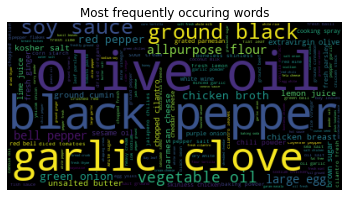

In [4]:
full_ing_text = " ".join(ingredients_text.values)
wordcloud  = WordCloud().generate(full_ing_text)

plt.imshow(wordcloud)
plt.title("Most frequently occuring words")
plt.axis("off")
plt.show()

In [8]:
print("Shape of ingredients = ", ingredients_text.shape)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(ingredients_text)

print(X.shape)
print(X)

Shape of ingredients =  (39774,)
(39774, 3057)
  (0, 2329)	0.3426308034163987
  (0, 1546)	0.2663588843454822
  (0, 230)	0.14063713569310485
  (0, 1895)	0.26098157183361415
  (0, 1178)	0.3502745662929836
  (0, 2816)	0.15181908252212178
  (0, 1101)	0.10529956769097745
  (0, 2028)	0.1020732917707325
  (0, 2212)	0.2391068518841475
  (0, 1899)	0.16453186533503777
  (0, 2437)	0.2300545697461994
  (0, 1095)	0.3884899344761486
  (0, 168)	0.2074660261516008
  (0, 964)	0.30400394602019953
  (0, 513)	0.14566825492643998
  (0, 736)	0.3342850337273161
  (1, 230)	0.16809893056128647
  (1, 2816)	0.3629286857271454
  (1, 2028)	0.2440096792496257
  (1, 2111)	0.34034344662630883
  (1, 1020)	0.18169459371266572
  (1, 1214)	0.29827250579711134
  (1, 2383)	0.10737812434295843
  (1, 2795)	0.26959523716481065
  (1, 903)	0.19917356302194517
  :	:
  (39772, 2664)	0.2642259895860372
  (39772, 283)	0.2642259895860372
  (39772, 2643)	0.24452401489913989
  (39772, 2957)	0.24572830502673113
  (39773, 230)	0.1545765

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train, x_val, y_train, y_val = train_test_split(X, dataframe['cuisine'], test_size = 0.2, random_state = 100)

for K in range(10):
 K_value = K+1
 neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh.fit(x_train, y_train) 
 y_pred = neigh.predict(x_val)
 print("Accuracy is ", accuracy_score(y_val,y_pred) * 100,"% for K-Value:",K_value)

Accuracy is  69.22690131992456 % for K-Value: 1
Accuracy is  67.40414833438089 % for K-Value: 2
Accuracy is  71.06222501571338 % for K-Value: 3
Accuracy is  72.0678818353237 % for K-Value: 4
Accuracy is  72.74670018856065 % for K-Value: 5
Accuracy is  72.9855436832181 % for K-Value: 6
Accuracy is  73.41294783155247 % for K-Value: 7
Accuracy is  73.66436203645506 % for K-Value: 8
Accuracy is  74.00377121307355 % for K-Value: 9
Accuracy is  73.75235700817096 % for K-Value: 10


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

   brazilian       0.66      0.51      0.57        87
     british       0.60      0.41      0.49       168
cajun_creole       0.66      0.69      0.68       288
     chinese       0.71      0.87      0.79       514
    filipino       0.62      0.50      0.55       142
      french       0.51      0.60      0.55       532
       greek       0.68      0.59      0.63       226
      indian       0.85      0.85      0.85       609
       irish       0.66      0.44      0.53       135
     italian       0.74      0.86      0.80      1588
    jamaican       0.86      0.62      0.72       115
    japanese       0.85      0.65      0.74       271
      korean       0.81      0.71      0.76       182
     mexican       0.84      0.89      0.86      1294
    moroccan       0.75      0.72      0.73       173
     russian       0.89      0.29      0.43        84
 southern_us       0.70      0.69      0.70       857
     spanish       0.64    